# Neural Network Classification Problems

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Binary Class Classification

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=10000

X,y= make_circles(n_samples,noise=0.03, random_state=42)

In [2]:
X[:5]

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       [ 0.98478298, -0.32517879],
       [ 0.82993028, -0.54722305]])

In [3]:
y[:5]

array([1, 0, 0, 0, 0])

### Visualizing the data

In [4]:
circles=pd.DataFrame({"X_0": X[:,0], "X_1": X[:,1], "label":y})
circles[:5]

,X_0,X_1,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0


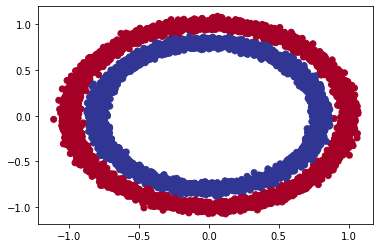

In [5]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((10000, 2), (10000,))

In [7]:
len(X), len(y)

(10000, 10000)

In [8]:
X[:5]

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       [ 0.98478298, -0.32517879],
       [ 0.82993028, -0.54722305]])

In [9]:
y[:5]

array([1, 0, 0, 0, 0])

In [10]:
X[0], y[0]

(array([0.0464692 , 0.82477834]), 1)

In [11]:
X[1], y[1]

(array([ 1.00506323, -0.43335153]), 0)

In [12]:
X[2], y[2]

(array([-0.58348442,  0.79452834]), 0)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((7000, 2), (3000, 2), (7000,), (3000,))

In [28]:
model= tf.keras.Sequential([
          tf.keras.Input(shape=(2,)),
          tf.keras.layers.Dense(100, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model.fit(X_train,y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.5489
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7346
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.9266
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.9706
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.9896
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.9960
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.9984
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.9989
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.9996
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9996

In [15]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9993


[0.20384356379508972, 0.9993333220481873]

### Non_linear Activation Function

> All of the activation fuctions except the *linear* function are non-linear activation functions.

In [29]:
model_linear= tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation="linear"),
])

model_linear.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model_linear.fit(X_train,y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 6.0172 - accuracy: 0.4869
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 5.9463 - accuracy: 0.4877
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 5.8291 - accuracy: 0.4851
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 5.7269 - accuracy: 0.4857
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 5.6528 - accuracy: 0.4843
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 5.5494 - accuracy: 0.4827
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 5.3478 - accuracy: 0.4814
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 4.9599 - accuracy: 0.4774
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 4.5944 - accuracy: 0.4720
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 4.5418 - accuracy: 0.4717

In [22]:
model_linear.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5047


[0.6940203309059143, 0.5046666860580444]

In [30]:
model_1= tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.7028 - accuracy: 0.4884
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4590
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6051
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.7107
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7566
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.8173
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8304
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8619
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8904
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4032 - accura

In [24]:
model_1.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.9960


[0.01403262559324503, 0.9959999918937683]

### Improving the model

In [36]:
model_2= tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])


history=model_2.fit(X_train,y_train, epochs=25)

Epoch 1/25
219/219 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5230
Epoch 2/25
219/219 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6069
Epoch 3/25
219/219 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6539
Epoch 4/25
219/219 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.6693
Epoch 5/25
219/219 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.6804
Epoch 6/25
219/219 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.6983
Epoch 7/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7733
Epoch 8/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8186
Epoch 9/25
219/219 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8486
Epoch 10/25
219/219 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8769

In [37]:
model_2.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.9533


[0.12336252629756927, 0.95333331823349]

### Plot the loss or training curves

In [38]:
history.history

{'accuracy': [0.5230000019073486,
  0.6068571209907532,
  0.6538571715354919,
  0.6692857146263123,
  0.6804285645484924,
  0.698285698890686,
  0.7732856869697571,
  0.8185714483261108,
  0.8485714197158813,
  0.8768571615219116,
  0.8845714330673218,
  0.9071428775787354,
  0.9225714206695557,
  0.9182857275009155,
  0.920714259147644,
  0.9274285435676575,
  0.9399999976158142,
  0.9481428861618042,
  0.9502857327461243,
  0.9458571672439575,
  0.9490000009536743,
  0.9599999785423279,
  0.9555714130401611,
  0.9627143144607544,
  0.9625714421272278],
 'loss': [0.6882358193397522,
  0.6465449333190918,
  0.5952511429786682,
  0.5760034918785095,
  0.5648202896118164,
  0.5499386787414551,
  0.47044873237609863,
  0.4128561019897461,
  0.3630664348602295,
  0.3172115087509155,
  0.295015811920166,
  0.2560456395149231,
  0.22576020658016205,
  0.21737957000732422,
  0.2088690549135208,
  0.18827880918979645,
  0.16179117560386658,
  0.14586563408374786,
  0.14089450240135193,
  0.143

In [39]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.688236,0.523000
1,0.646545,0.606857
2,0.595251,0.653857
3,0.576003,0.669286
4,0.564820,0.680429
5,0.549939,0.698286
6,0.470449,0.773286
7,0.412856,0.818571
8,0.363066,0.848571
9,0.317212,0.876857


Text(0.5, 1.0, 'Model_2 Loss Curve')

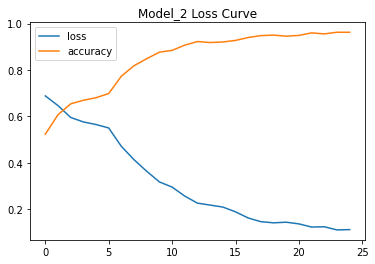

In [41]:
pd.DataFrame(history.history).plot()
plt.title("Model_2 Loss Curve")

### Find the ideal/best learning rate

**Steps**

* Learning rate **callback** is an extra piece of functionality, which we can add *while* the model is training.

* Build another model

* Modified lost curve plot

In [49]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_3=model_3.fit(X_train,y_train, epochs=100, callbacks=[lr_callback])

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4989 - lr: 1.0000e-04
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5046 - lr: 1.1220e-04
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5221 - lr: 1.2589e-04
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5264 - lr: 1.4125e-04
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5334 - lr: 1.5849e-04
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5361 - lr: 1.7783e-04
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5449 - lr: 1.9953e-04
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5494 - lr: 2.2387e-04
Epoch 9/100
219/219 [==============================] - 0

In [50]:
model_3.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 1.0935 - accuracy: 0.4870


[1.0934902429580688, 0.4869999885559082]

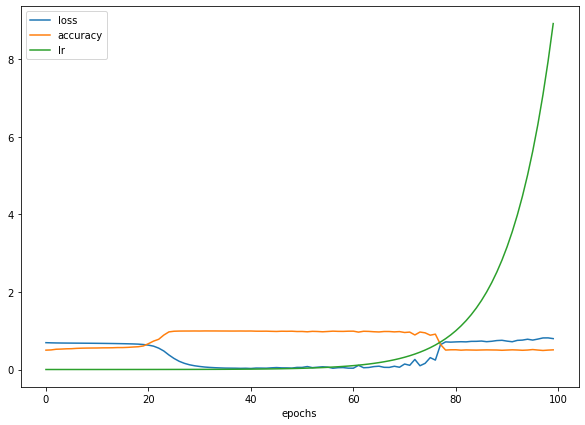

In [51]:
pd.DataFrame(history_3.history).plot(figsize=(10,7), xlabel="epochs")

### Learning rate VS Loss

In [53]:
lrs=  1e-4 *(10** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [54]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate VS Loss')

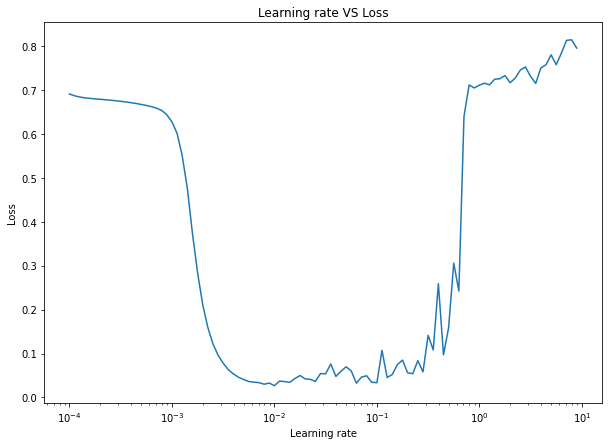

In [56]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate VS Loss")

### Examples of some usual learning rate

In [57]:
10**0, 10**-1, 10**-2,10**-3,10**-4, 1e-4 

(1, 0.1, 0.01, 0.001, 0.0001, 0.0001)